In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as plt
%matplotlib inline


from scipy.stats import mode

/Users/varya_hai/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/varya_hai/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
sns.set_theme(
    font_scale = 2,                         # размер шрифта
    style      = 'whitegrid',               # стиль поля графика
    rc         = {'figure.figsize':(20,10)}  # размер фигуры
)

In [ ]:
games = pd.read_csv('/Users/varya_hai/Karpov.courses/1 games.csv')
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
games.Name.describe()

count                           16598
unique                          11493
top       Need for Speed: Most Wanted
freq                               12
Name: Name, dtype: object

In [5]:
games.dropna(inplace=True)

In [6]:
games.shape

(16291, 11)

In [7]:
games.Year.mode()

0    2009.0
Name: Year, dtype: float64

In [8]:
games.Year.median() - games.Year.mean()

0.5944386471057896

In [9]:
games.Year.median()

2007.0

In [10]:
games.Year = games.Year.astype('int')

/var/folders/w0/ntgk1ch94_q3p2ylkj5h0j740000gn/T/ipykernel_11406/41280522.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=games, x='Year', palette='husl')


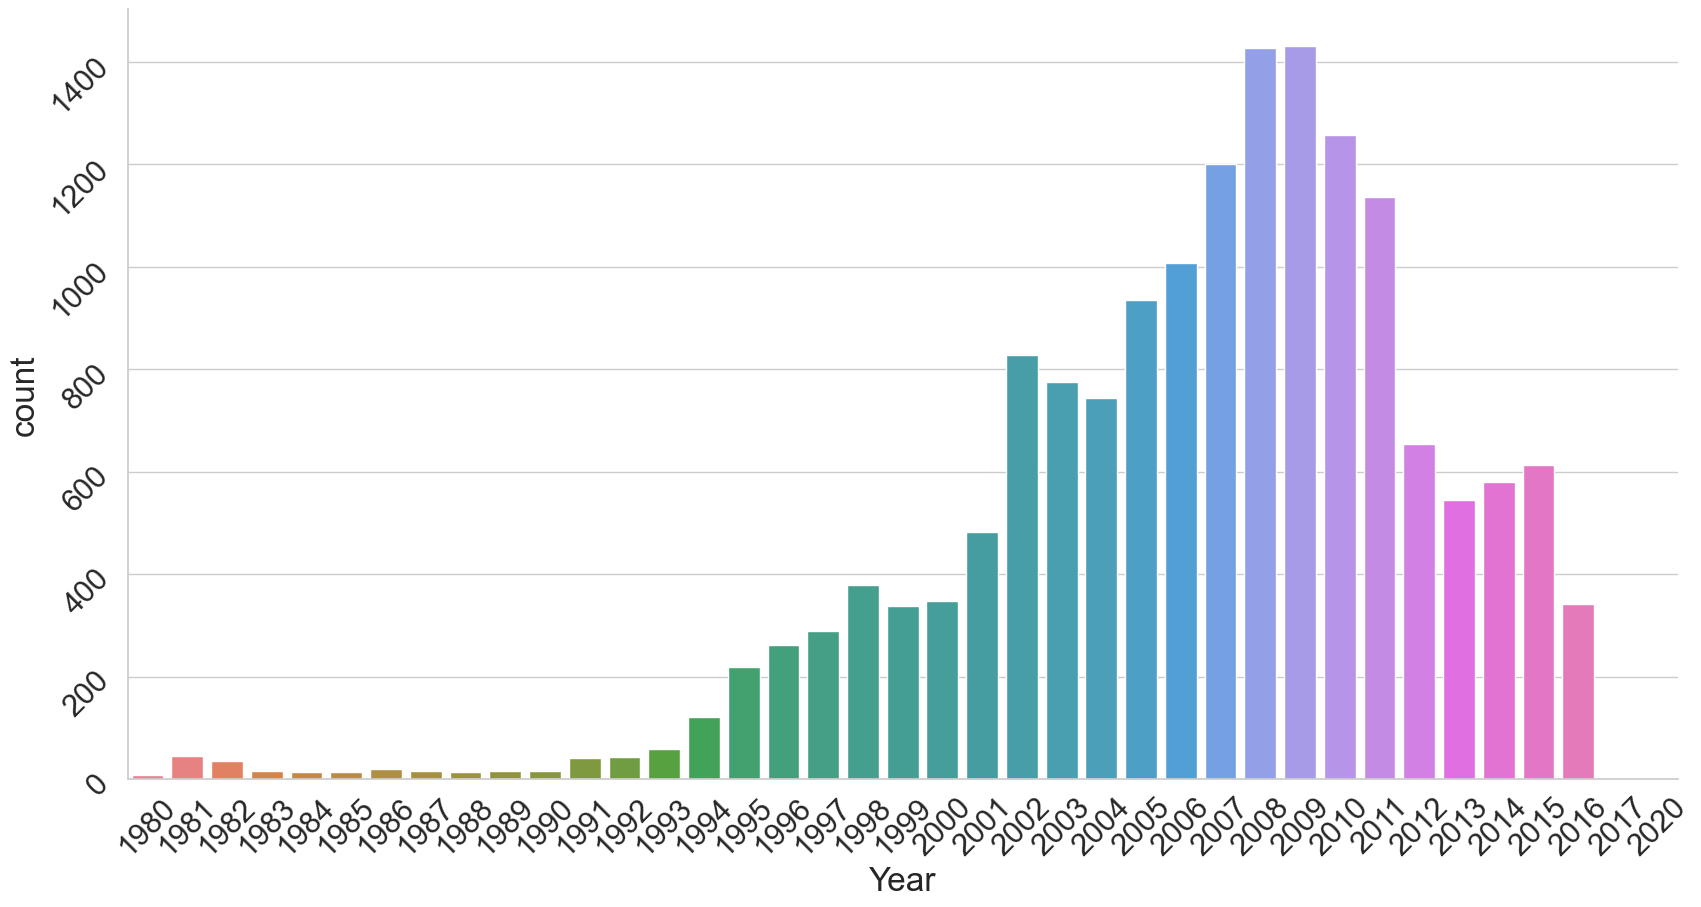

In [11]:
ax = sns.countplot(data=games, x='Year', palette='husl')
ax.tick_params(rotation=45)

sns.despine()

3.	На каких платформах произошло больше всего релизов?

вывести только те, частота встречаемости которых больше 7%

In [16]:
games_pl = games.Platform.value_counts().sort_values(ascending=False).reset_index().rename(columns={'count':'count_val'})
games_pl.head()

,Platform,count_val
0,DS,2131
1,PS2,2127
2,PS3,1304
3,Wii,1290
4,X360,1234


In [20]:
games_pl[games_pl.count_val*100/games_pl.count_val.sum() > 7].Platform.to_list()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

4.	Игры каких издателей (Publisher) встречаются в датасете чаще всего?

в ответ указать максимальное значение

In [21]:
games.Publisher.value_counts().sort_values(ascending=False).values[0]

1339

In [22]:
games.Publisher.describe()

count               16291
unique                576
top       Electronic Arts
freq                 1339
Name: Publisher, dtype: object

In [23]:
mode(games.Publisher)

/var/folders/w0/ntgk1ch94_q3p2ylkj5h0j740000gn/T/ipykernel_11406/2270698548.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode(games.Publisher)
/Users/varya_hai/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
/var/folders/w0/ntgk1ch94_q3p2ylkj5h0j740000gn/T/ipykernel_11406/2270698548.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can 

ModeResult(mode=array(['Electronic Arts'], dtype=object), count=array([1339]))

5.	В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)

In [24]:
games\
      .query('Publisher=="Nintendo"')\
      [['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]\
      .agg(['mean','median','std'])

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
mean,1.172055,0.601006,0.653721,0.136767
median,0.375000,0.120000,0.280000,0.030000
std,2.989913,1.743953,1.063110,0.464170


In [25]:
games\
      .query('Publisher=="Nintendo"')\
      [['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]\
      .describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,696.000000,696.000000,696.000000,696.000000
mean,1.172055,0.601006,0.653721,0.136767
std,2.989913,1.743953,1.063110,0.464170
min,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.007500,0.090000,0.000000
50%,0.375000,0.120000,0.280000,0.030000
75%,0.972500,0.482500,0.740000,0.090000
max,41.490000,29.020000,10.220000,8.460000


6.	Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.

Постройте боксплот, где по оси х - жанр, по оси у - объем продаж в Японии

/var/folders/w0/ntgk1ch94_q3p2ylkj5h0j740000gn/T/ipykernel_11406/1974816540.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=games.query('Publisher=="Nintendo"'),x='Genre',y='JP_Sales',palette='husl')


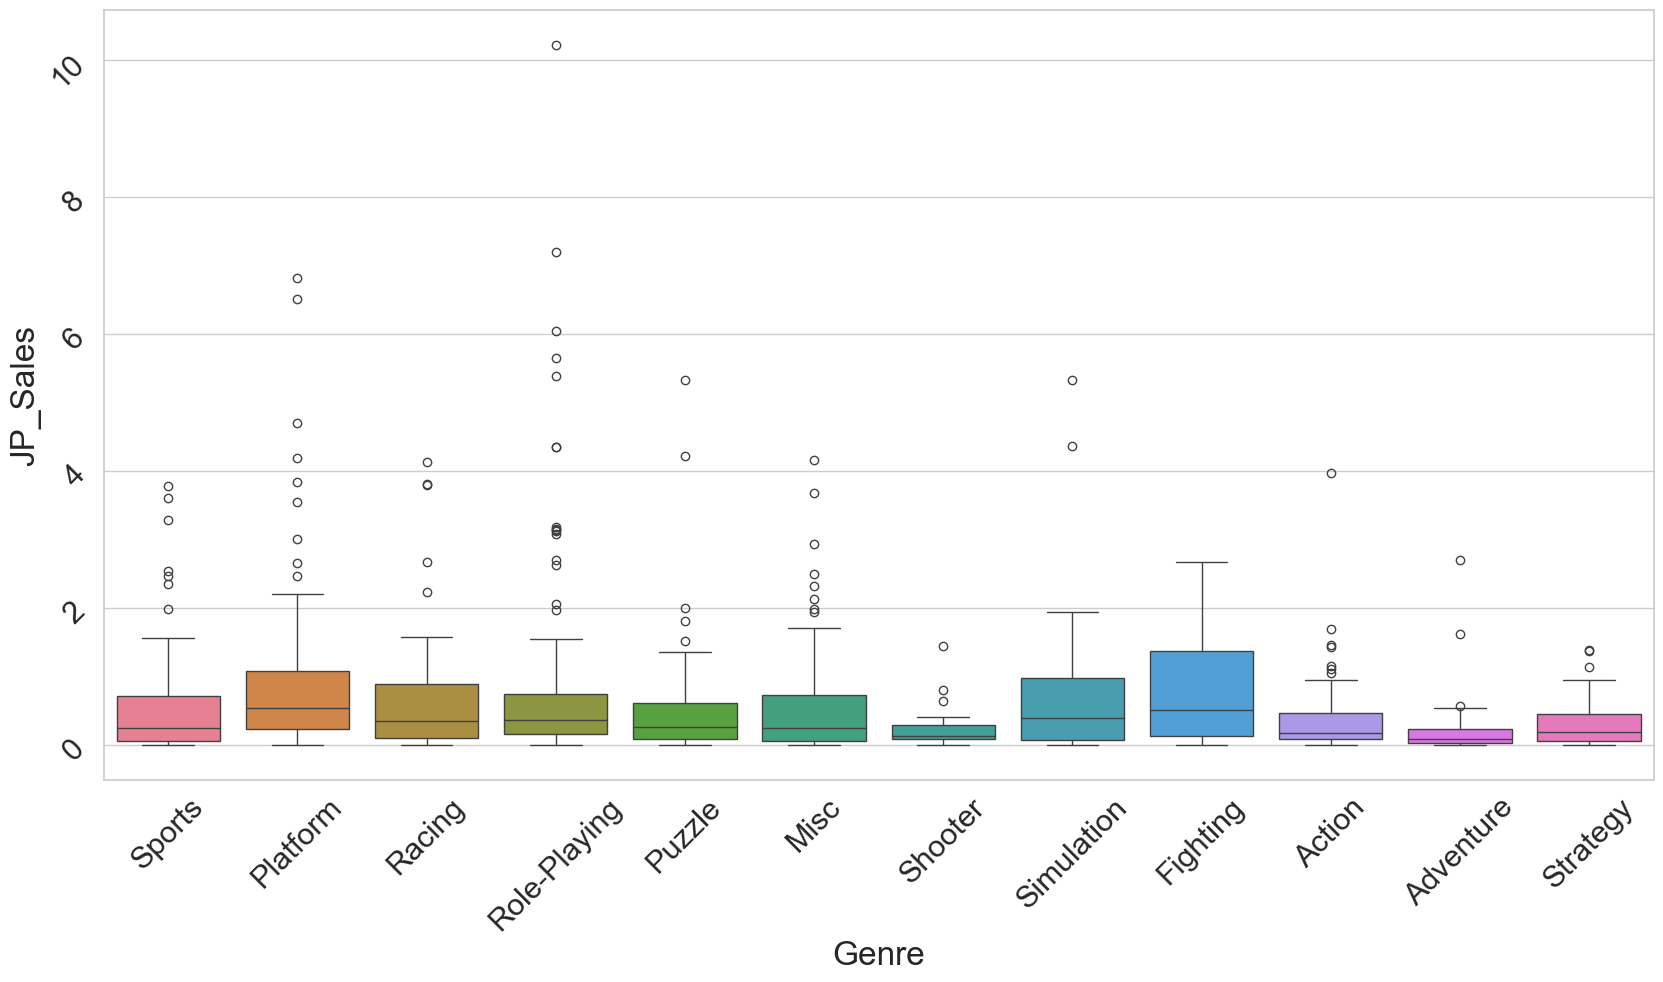

In [26]:
ax = sns.boxplot(data=games.query('Publisher=="Nintendo"'),x='Genre',y='JP_Sales',palette='husl')
ax.tick_params(rotation=45)

7.	Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?

In [27]:
global_nint = games\
      .query('Publisher=="Nintendo" & (Genre=="Fighting" | Genre=="Simulation" | Genre=="Racing" | Genre=="Sports")')\
      .groupby(['Year','Genre'])\
      .Global_Sales\
      .sum()\
      .reset_index()

In [28]:
global_nint.head()

,Year,Genre,Global_Sales
0,1983,Sports,3.20
1,1984,Racing,5.68
2,1984,Sports,6.18
3,1985,Sports,1.96
4,1986,Racing,1.96


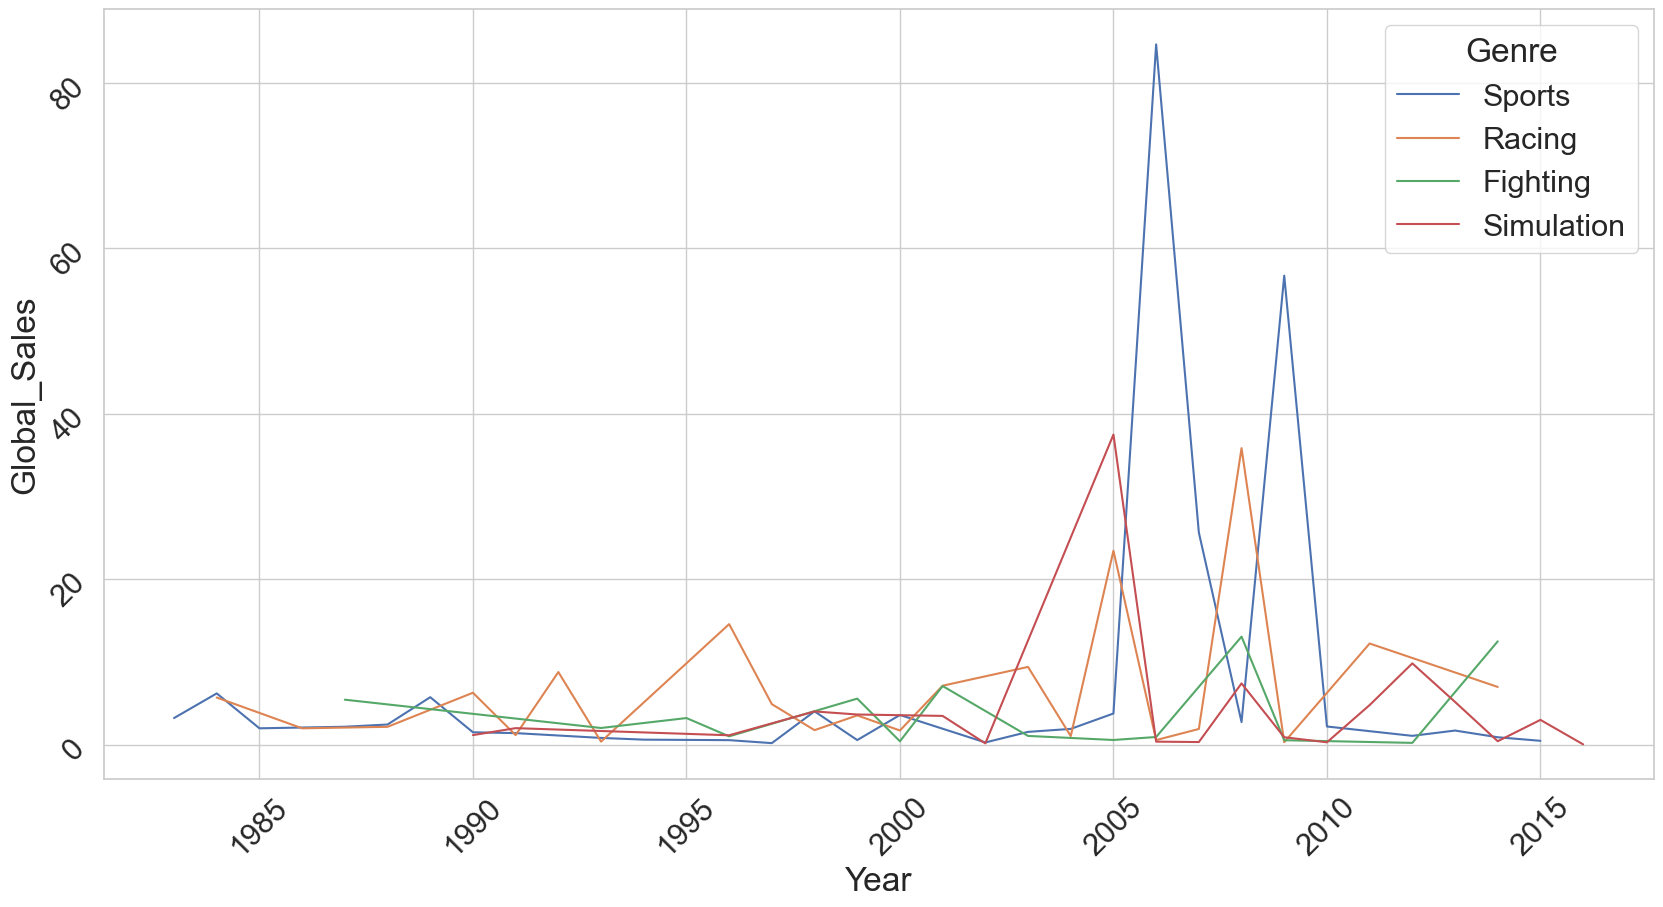

In [29]:
ax = sns.lineplot(x=global_nint.Year,y=global_nint.Global_Sales,hue=global_nint.Genre)
ax.tick_params(rotation=45)